In [28]:
import pandas as pd
from prophet.plot import plot_plotly, plot_components_plotly
from prophet import Prophet
#from fbprophet import Prophet

In [19]:
data = pd.read_csv('E:/Analyzing_Unemployment_rate_across_the_world/Business Case Studies/2ndpart.csv')
data.drop(['Unnamed: 0','code_3','continent','sub_region','average','91-20','20-21','21-22'],axis=1,inplace=True)
data.head()

,Country Name,Country Code,1991,1992,1993,1994,1995,1996,1997,1998,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Afghanistan,AFG,10.65,10.82,10.72,10.73,11.18,10.96,10.78,10.80,...,11.34,11.19,11.14,11.13,11.16,11.18,11.15,11.22,11.71,13.28
1,Albania,ALB,10.31,30.01,25.26,20.84,14.61,13.93,16.88,20.05,...,13.38,15.87,18.05,17.19,15.42,13.62,12.30,11.47,13.33,11.82
2,Algeria,DZA,20.60,24.38,26.23,27.74,31.84,28.53,25.43,26.66,...,10.97,9.82,10.21,11.21,10.20,10.33,10.42,10.51,12.55,12.70
3,Angola,AGO,4.21,4.21,4.23,4.16,4.11,4.10,4.09,4.07,...,7.35,7.37,7.37,7.39,7.41,7.41,7.42,7.42,8.33,8.53
4,Argentina,ARG,5.44,6.36,10.10,11.76,18.80,17.11,14.82,12.65,...,7.22,7.10,7.27,7.52,8.11,8.35,9.22,9.84,11.46,10.90


In [20]:
#transposing the dataset
data_n=data.T

#dropping unwanted columns
data_n.drop('Country Code',axis=0,inplace=True)

#converting rows into header column
header_row = 0
data_n.columns = data_n.iloc[header_row]
#print(data_n)

# Convert row to column header using DataFrame.iloc[]
data_n.columns = data_n.iloc[0]
#print(data_n)

#dropping unwanted columns
data_n.drop('Country Name',axis=0,inplace=True)

#sorting the columns
data_n.sort_index(axis=1,inplace=True)

#resetting index values as column name
data_n.reset_index(level=0,inplace=True)

data_n.rename(columns={'index':'year'},inplace=True)

#checking datatypes
datas=data_n.infer_objects()
datas.head()
#datas.drop('Country Name',axis=1,inplace=True)


Country Name,year,Afghanistan,Albania,Algeria,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,...,Uruguay,Uzbekistan,Vanuatu,"Venezuela, RB",Vietnam,Virgin Islands (U.S.),West Bank and Gaza,"Yemen, Rep.",Zambia,Zimbabwe
0,1991,10.65,10.31,20.60,4.21,5.44,1.6,9.58,3.42,0.9,...,8.95,1.9,1.68,9.45,2.09,12.35,11.60,8.32,18.90,4.94
1,1992,10.82,30.01,24.38,4.21,6.36,1.8,10.73,3.59,1.8,...,8.96,2.9,1.69,7.69,1.91,12.51,11.31,8.31,19.37,4.99
2,1993,10.72,25.26,26.23,4.23,10.10,5.3,10.87,4.25,4.5,...,8.35,4.9,1.73,6.60,1.97,12.70,11.29,8.35,19.70,4.97
3,1994,10.73,20.84,27.74,4.16,11.76,6.6,9.72,3.54,6.3,...,9.04,7.3,1.59,8.56,1.93,12.47,11.15,8.34,18.43,4.96
4,1995,11.18,14.61,31.84,4.11,18.80,6.7,8.47,4.35,7.2,...,10.02,7.8,1.74,10.24,1.90,12.13,11.10,8.96,16.81,5.63


# **Forecasting For India**

In [22]:
data_india = pd.DataFrame()
data_india['year'] = datas['year']
data_india['india'] = datas['India']
data_india.head()

,year,india
0,1991,5.60
1,1992,5.73
2,1993,5.69
3,1994,5.74
4,1995,5.76


In [23]:
data_india.columns = ['ds','y']
data_india.head()

,ds,y
0,1991,5.60
1,1992,5.73
2,1993,5.69
3,1994,5.74
4,1995,5.76


In [24]:
data_india['ds'] = pd.to_datetime(data_india['ds'])
data_india.tail()

,ds,y
26,2017-01-01,5.36
27,2018-01-01,5.33
28,2019-01-01,5.27
29,2020-01-01,8.00
30,2021-01-01,5.98


<Axes: xlabel='ds'>

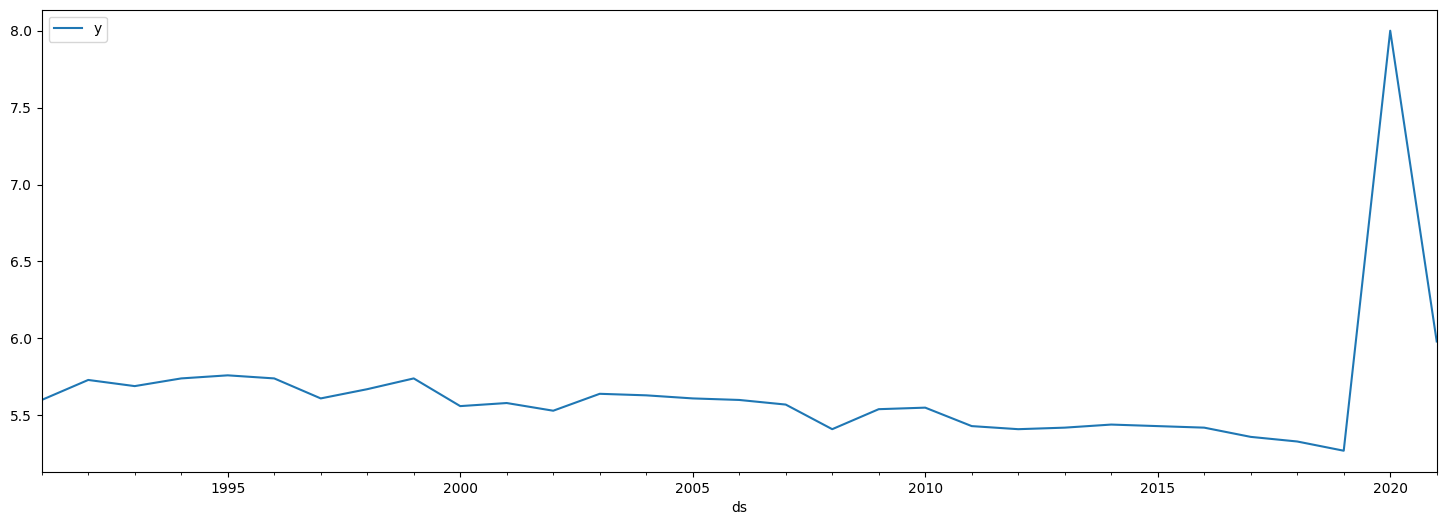

In [25]:
data_india.plot(x='ds',y='y',figsize=(18,6))

In [32]:
train = data_india.iloc[:len(data_india)]
test = data_india.iloc[len(data_india):]

In [41]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=50) #MS for monthly, H for hourly
forecast = m.predict(future)

22:38:13 - cmdstanpy - INFO - Chain [1] start processing
22:38:13 - cmdstanpy - INFO - Chain [1] done processing


In [42]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
76,2021-02-16,4.370696,-31.319300,-30.214219,4.370696,4.370696,-35.111917,-35.111917,-35.111917,-35.111917,-35.111917,-35.111917,0.0,0.0,0.0,-30.741221
77,2021-02-17,4.370710,-25.171259,-24.056897,4.370710,4.370710,-28.979742,-28.979742,-28.979742,-28.979742,-28.979742,-28.979742,0.0,0.0,0.0,-24.609033
78,2021-02-18,4.370723,-18.722742,-17.557984,4.370723,4.370723,-22.492741,-22.492741,-22.492741,-22.492741,-22.492741,-22.492741,0.0,0.0,0.0,-18.122017
79,2021-02-19,4.370737,-12.059293,-10.962369,4.370737,4.370737,-15.845344,-15.845344,-15.845344,-15.845344,-15.845344,-15.845344,0.0,0.0,0.0,-11.474607
80,2021-02-20,4.370751,-5.452011,-4.291163,4.370751,4.370751,-9.230665,-9.230665,-9.230665,-9.230665,-9.230665,-9.230665,0.0,0.0,0.0,-4.859914


In [43]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
76,2021-02-16,-30.741221,-31.319300,-30.214219
77,2021-02-17,-24.609033,-25.171259,-24.056897
78,2021-02-18,-18.122017,-18.722742,-17.557984
79,2021-02-19,-11.474607,-12.059293,-10.962369
80,2021-02-20,-4.859914,-5.452011,-4.291163


In [44]:
plot_plotly(m ,forecast)

In [45]:
plot_components_plotly(m, forecast)